## IDEA:
## Subscribers are less likely than Customers to choose biking for commuting
## Null Hypothesis:
## The ratio of Subscribers biking on weekends over Subscribers biking on the whole week is the same or higher than the ratio of Customers biking over weekends to Customers biking on the whole week
## _$H_0$ : $\frac{Sub{\mathrm{weekend}}}{Sub{\mathrm{week}}} >= \frac{Cus{\mathrm{weekend}}}{Cus_{\mathrm{week}}}$
## _$H_1$ : $\frac{Sub{\mathrm{weekend}}}{Sub{\mathrm{week}}} < \frac{Cus{\mathrm{weekend}}}{Cus_{\mathrm{week}}}$
## I will use a significance level  $\alpha=0.05$
## which means i want the probability of getting a result at least as significant as mine to be less then 5%
## I'm using the data of citibike in 201705

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import zipfile
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
zipFile =zipfile.ZipFile("/gws/open/Student/citibike/201705-citibike-tripdata.csv.zip")

In [3]:
zipFile.extractall(path=(os.getenv('PUIDATA')+'/citibike/'))

In [4]:
df = pd.read_csv(os.getenv('PUIDATA')+'/citibike/201705-citibike-tripdata.csv')

In [5]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,254,2017-05-01 00:00:13,2017-05-01 00:04:27,511,E 14 St & Avenue B,40.729387,-73.977724,394,E 9 St & Avenue C,40.725213,-73.977688,27695,Subscriber,1996.0,2
1,248,2017-05-01 00:00:19,2017-05-01 00:04:28,511,E 14 St & Avenue B,40.729387,-73.977724,394,E 9 St & Avenue C,40.725213,-73.977688,15869,Subscriber,1996.0,1
2,1120,2017-05-01 00:00:19,2017-05-01 00:19:00,242,Carlton Ave & Flushing Ave,40.697787,-73.973736,3083,Bushwick Ave & Powers St,40.712477,-73.941000,18700,Subscriber,1985.0,2
3,212,2017-05-01 00:00:24,2017-05-01 00:03:56,168,W 18 St & 6 Ave,40.739713,-73.994564,116,W 17 St & 8 Ave,40.741776,-74.001497,24981,Subscriber,1993.0,1
4,686,2017-05-01 00:00:29,2017-05-01 00:11:55,494,W 26 St & 8 Ave,40.747348,-73.997236,527,E 33 St & 2 Ave,40.744023,-73.976056,25407,Subscriber,1964.0,1


In [6]:
df.groupby(['usertype']).size()

usertype
Customer       189760
Subscriber    1333508
dtype: int64

In [7]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [8]:
df=df[['usertype','starttime']]

In [9]:
df.head()

,usertype,starttime
0,Subscriber,2017-05-01 00:00:13
1,Subscriber,2017-05-01 00:00:19
2,Subscriber,2017-05-01 00:00:19
3,Subscriber,2017-05-01 00:00:24
4,Subscriber,2017-05-01 00:00:29


In [10]:
df= df.rename(columns={'starttime':'time'})
df['time'] = pd.to_datetime(df['time'])
df.head()

,usertype,time
0,Subscriber,2017-05-01 00:00:13
1,Subscriber,2017-05-01 00:00:19
2,Subscriber,2017-05-01 00:00:19
3,Subscriber,2017-05-01 00:00:24
4,Subscriber,2017-05-01 00:00:29


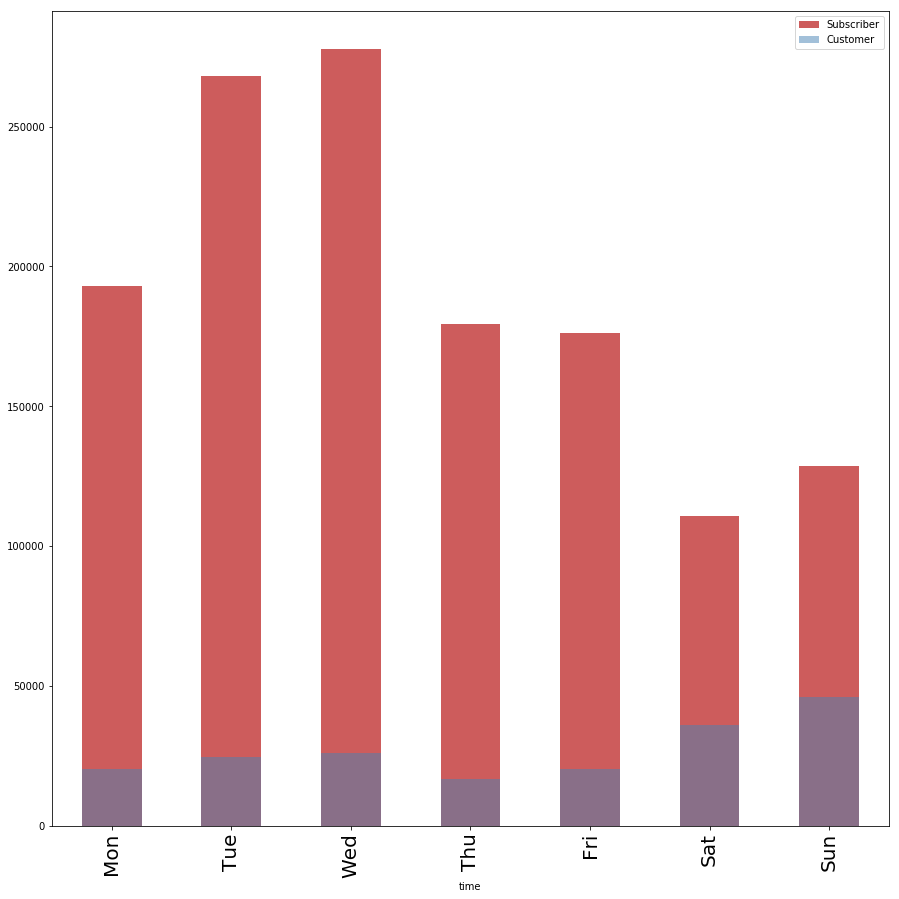

In [11]:
fig = pl.figure(figsize(15,15))

norm_Sub = 1
((df['time'][df['usertype'] == 'Subscriber'].groupby([df['time'].dt.weekday]).count()) / norm_Sub).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='Subscriber')

norm_Cus = 1
ax = ((df['time'][df['usertype'] == 'Customer'].groupby([df['time'].dt.weekday]).count()) / norm_Cus).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='Customer')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.legend()

## Figure 1a: Distribution of Citibike bikers by usertype in May 2017, absolute counts



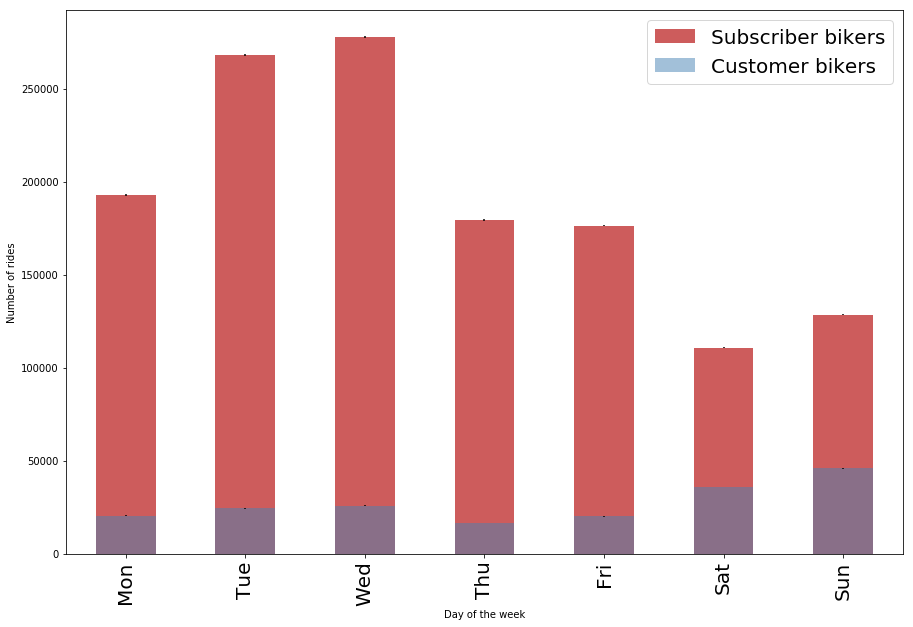

In [12]:
fig=pl.figure(figsize(15,10))

counts_Sub = df.time[df.usertype == 'Subscriber'].groupby([df.time.dt.weekday]).count()
norm_Sub = 1
error_Sub = np.sqrt(counts_Sub)
ax=((counts_Sub) / norm_Sub).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_Sub) / norm_Sub, (error_Sub) / norm_Sub)], label='Subscriber bikers')


counts_Cus = df.time[df.usertype == 'Customer'].groupby([df.time.dt.weekday]).count()
norm_Cus = 1
error_Cus=np.sqrt(counts_Cus)
((counts_Cus) / norm_Cus).plot(kind="bar", alpha=0.5, yerr=[((error_Cus) / norm_Cus, (error_Cus) / norm_Cus)], 
                           color='SteelBlue', label='Customer bikers')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
pl.legend(['Subscriber bikers','Customer bikers'],fontsize=20)

## Figure 1b: Distribution of Citibike bikers by usertype in May 2017, absolute counts, with statistical errors

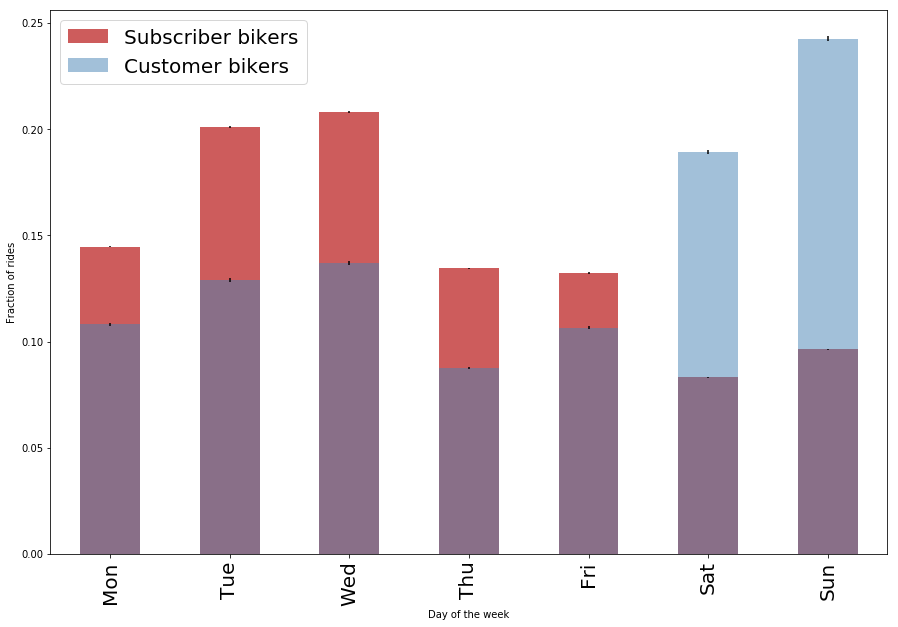

In [13]:
fig = pl.figure(figsize(15,10))

norm_Sub = counts_Sub.sum()
error_Sub = np.sqrt(counts_Sub)
((counts_Sub) / norm_Sub).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_Sub) / norm_Sub, (error_Sub) / norm_Sub)], 
                           label='Subscriber bikers')

norm_Cus = counts_Cus.sum()
ax = ((counts_Cus) / norm_Cus).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_Cus) / norm_Cus, (error_Cus) / norm_Cus)], 
                                color='SteelBlue', label='Customer bikers')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day of the week")

pl.legend(['Subscriber bikers','Customer bikers'],fontsize=20)

## Figure 2: Distribution of Citibike bikers by usertype in May 2017, normalized

In [34]:
import statsmodels.stats.proportion as st

In [19]:
counts_Sub

time
0    192909
1    267929
2    277617
3    179270
4    176395
5    110806
6    128582
Name: time, dtype: int64

In [41]:
Sub_weekend = counts_Sub[5:].sum()
Cus_weekend = counts_Cus[5:].sum()
count = np.array([Sub_weekend,Cus_weekend])
nobs = np.array([norm_Sub,norm_Cus])
result = st.proportions_ztest(count, nobs, value=0, alternative='smaller', prop_var=False)
print('z-score is {} and p-value is {}'.format(result[0],result[1]))

z-score is -252.09274206 and p-value is 0.0


## Under the significance level=0.05, we can see that p-value=0.0<0.5 so we can reject the null hypothesis that  the ratio of subscribers biking on weekends over subscribers biking on the whole week is the same or higher than the ratio of customers biking over weekends to customers biking on the whole week.  Then we can accept the alternative hypothesis that     ratio of     subscribers biking on weekends over subscribers biking on the whole week is lower.     